In [1]:
import datetime
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ndays = 7
sensor_id = 36

In [3]:
data = pd.DataFrame()
ldate = datetime.date.today() - datetime.timedelta(1)
for x in range(ndays):
    dt = str(ldate - datetime.timedelta(x))
    url = "http://archive.madflex.de/{dt}/{dt}_ppd42ns_sensor_{sensor_id}.csv".format(dt=dt, sensor_id=sensor_id)
    print(url)
    r = requests.get(url)
    data = data.append(pd.read_csv(StringIO(r.text), delimiter=';'))

http://archive.madflex.de/2016-01-06/2016-01-06_ppd42ns_sensor_36.csv
http://archive.madflex.de/2016-01-05/2016-01-05_ppd42ns_sensor_36.csv
http://archive.madflex.de/2016-01-04/2016-01-04_ppd42ns_sensor_36.csv
http://archive.madflex.de/2016-01-03/2016-01-03_ppd42ns_sensor_36.csv
http://archive.madflex.de/2016-01-02/2016-01-02_ppd42ns_sensor_36.csv
http://archive.madflex.de/2016-01-01/2016-01-01_ppd42ns_sensor_36.csv
http://archive.madflex.de/2015-12-31/2015-12-31_ppd42ns_sensor_36.csv


In [4]:
data[:3]

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,36,PPD42NS,23,NaN,NaN,2016-01-06T00:00:20.118244+00:00,66.61,38108,0.12,0.62,38108,0
1,36,PPD42NS,23,NaN,NaN,2016-01-06T00:00:50.418432+00:00,135.30,77684,0.25,0.62,77684,0
2,36,PPD42NS,23,NaN,NaN,2016-01-06T00:01:20.733310+00:00,13.00,7145,0.20,0.62,7145,0


In [5]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [6]:
data['dt'] = data.apply(lambda row: datetime.datetime.strptime(row.timestamp[:-6], "%Y-%m-%dT%H:%M:%S.%f"),axis=1)

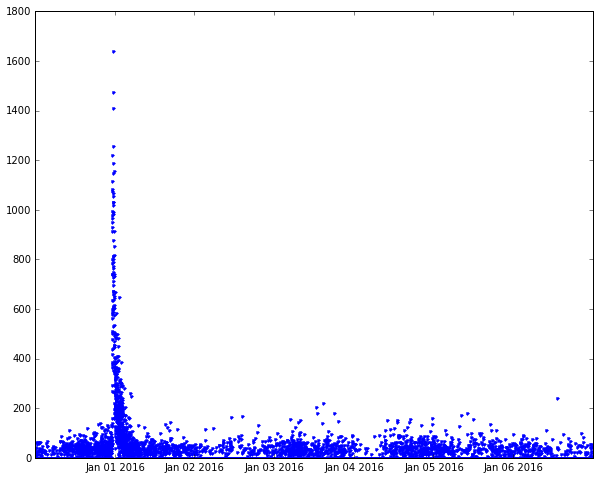

In [7]:
plt.plot(data.dt, data.P2, '.')

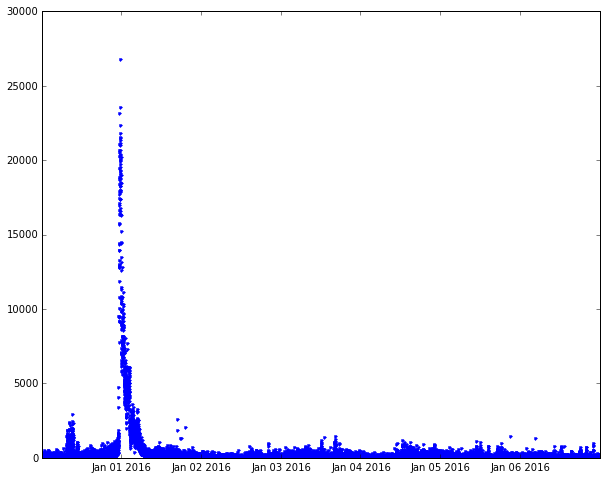

In [8]:
plt.plot(data.dt, data.P1, '.')